<a href="https://colab.research.google.com/github/marie-ganon/Projet-Python-S1/blob/main/Statistiques_descriptives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Préliminaires

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from urllib import request
from wordcloud import WordCloud, STOPWORDS 
import csv
import bs4
from tqdm.notebook import trange, tqdm
import seaborn as sns
import numpy as np

In [ ]:
import tempfile
temp_dir = tempfile.mkdtemp()

import zipfile

with zipfile.ZipFile('base.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('temp_dir')

df = pd.read_csv(r'temp_dir/base.csv', sep=',', low_memory = False)

In [4]:
df = pd.read_csv('base.csv')

# Statistiques sur la variable *genre*

On créé un data frame comportant tous les genres de films présents dans la base.

In [16]:
l = []
for i in trange(len(df)):
    genre = str(df.genres[i]).split()
    for j in genre :
        l.append(j)

      
df_genre = pd.DataFrame(l, columns=['genre'])


Text(0.5, 1.0, 'Occurrences des genres sur la base complète')

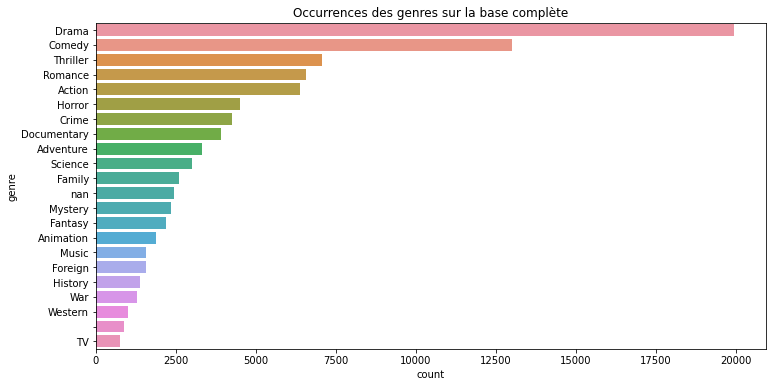

In [17]:
df_genre.genre = df_genre.genre.str.replace(r',', '')
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(y = df_genre.genre, order = df_genre['genre'].value_counts().index)
plt.title('Occurrences des genres sur la base complète')

Le graphique ci-dessus nous informe que les deux genres les plus représentés dans la base sont les comédies et les drames. Ce résultat est assez logique car ces types de films sont souvent donnés en complément d'un autre genre. A présent, étudions les films les mieux classés.

In [ ]:
df.vote_count

0        5415.0
1        2413.0
2          92.0
3          34.0
4         173.0
          ...  
45461       1.0
45462       3.0
45463       6.0
45464       0.0
45465       0.0
Name: vote_count, Length: 45466, dtype: float64

En regardant de plus près la variable *vote_count*, nous constatons que certains films comportent moins de 10 évaluations. Par conséquent, afin d'avoir une analyse plus fine de la base, nous allons étudier les genres les plus représentés sur les films les mieux notés selon le classement imdb, sous contrainte que suffisamment de personnes les aient évalués (plus de 100).

On construit donc "best movies" correspondant aux films ayant été notés par plus de 100 personnes et ayant une note supérieure à 7.0 qu'on compare à l'ensemble des films ayant été notés par plus de 100 personnes. 

In [18]:
df_classement =df[df.vote_count>100].sort_values(by='vote_average', ascending = False)     # on filtre sur les films qui ont été notés au moins 100 fois
df_best_movies = df_classement[df_classement.genres != '']    # on filtre sur les films pour lesquels le genre est renseigné
df_best_movies = df_best_movies[df.vote_average >= 7.0]      # on filtre sur les "meilleurs films" ie avec un score supérieur à 7
df_best_movies.reset_index(drop = True)
print('La base contient',len(df_best_movies),'films très bien notés (>= 7.0)')

La base contient 1760 films très bien notés (>= 7.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [19]:
l = []
for i in trange(len(df_best_movies)):
    if type(df_best_movies.genres.iloc[i]) == str :
        bm_genre = df_best_movies.genres.iloc[i].split()
        for i in bm_genre :
            l.append(i)
print(len(l))
df_bm_genre = pd.DataFrame(l, columns=['genre'])
df_bm_genre.genre = df_bm_genre.genre.str.replace(r',', '')
df_bm_genre['best_movies']=['Best movies' for i in range(len(df_bm_genre))]

df_genre['best_movies']=['All movies' for i in range(len(df_genre))]


4303


In [20]:
df_compare_genres = df_genre.append(df_bm_genre)

df_compare_genres.head()


,genre,best_movies
0,Animation,All movies
1,Comedy,All movies
2,Family,All movies
3,Adventure,All movies
4,Fantasy,All movies


Text(0.5, 1.0, 'Occurrences des genres des films les mieux notés vs occurrences de tous les genres ')

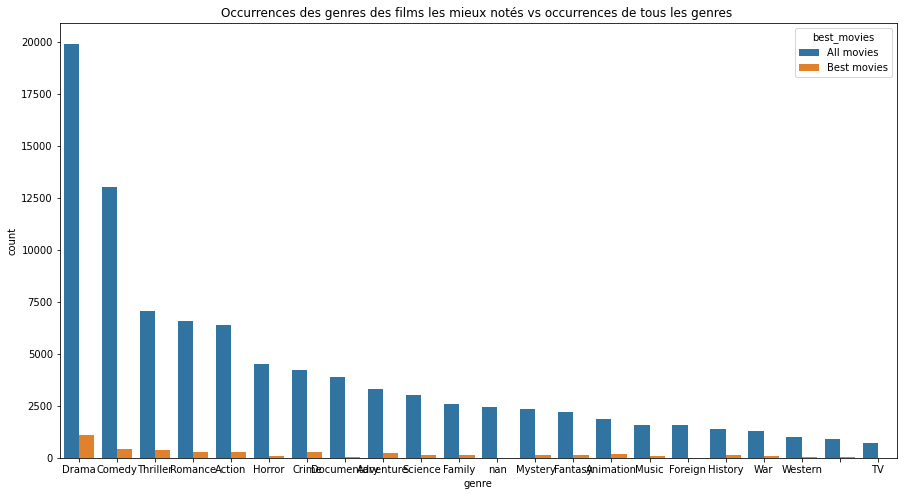

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='genre', hue='best_movies', data=df_compare_genres, order=df_genre.genre.value_counts(normalize=True).index)

plt.title('Occurrences des genres des films les mieux notés vs occurrences de tous les genres ')

Un plot des observations des genres des films les mieux notés contre ceux de tous les films ne nous permet pas de conclure. On normalise donc tout cela pour faire apparaître la fréquence d'apparition des genres pour l'ensemble des films et pour les films les mieux notés. 

Text(0.5, 1.0, 'Proportion des genres dans les films les mieux notés et dans tous les films')

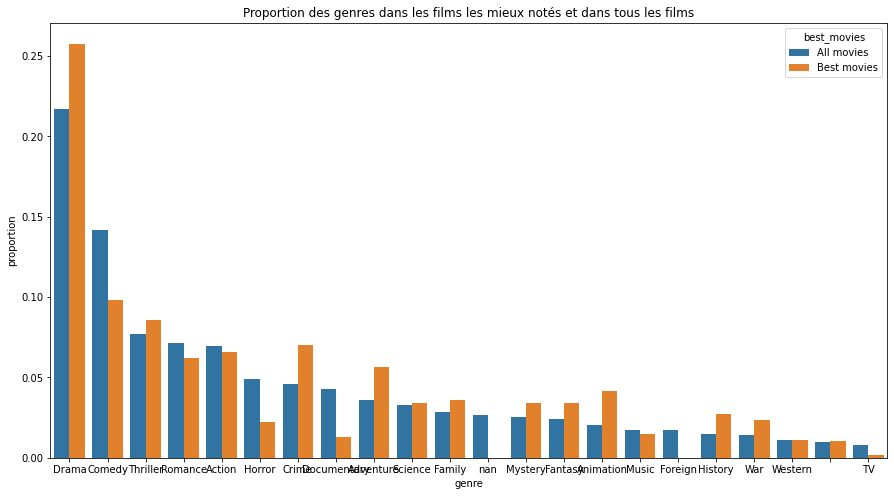

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
x, y, hue = "genre", "proportion", "best_movies"
(df_compare_genres[x].groupby(df_compare_genres[hue]).value_counts(normalize=True).rename(y).reset_index().pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

plt.title('Proportion des genres dans les films les mieux notés et dans tous les films')


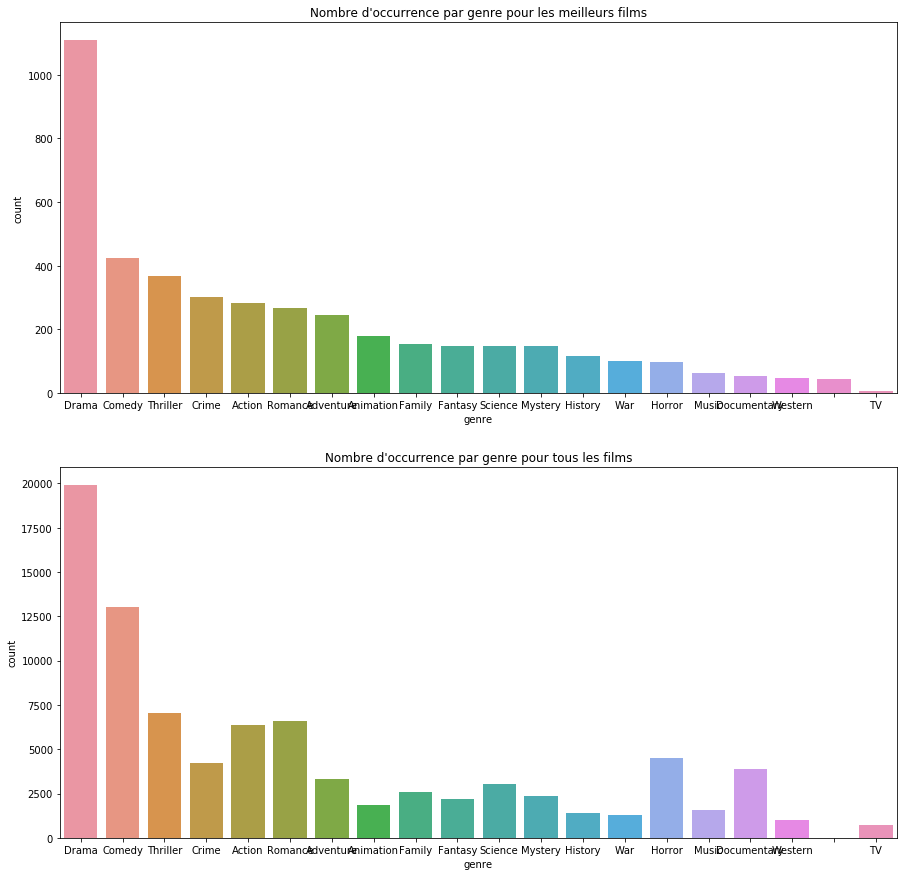

In [ ]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(15,15))
sns.countplot(x = df_bm_genre.genre, order = df_bm_genre.genre.value_counts().index, ax = ax_1)
sns.countplot(x = df_genre.genre, order = df_bm_genre.genre.value_counts().index,ax=ax_2)
ax_1.title.set_text("Nombre d'occurrence par genre pour les meilleurs films")
ax_2.title.set_text("Nombre d'occurrence par genre pour tous les films")

Nous remarquons que la tendance est sensiblement la même. En effet, avec environ plus de 18 000 films dramatiques, il est assez normal de trouver un bon nombre de films bien notés dans cet ensemble.

Toutefois, on constate que bien que certains genres de films soient très présents dans la base, ils peuvent apparaître moins souvent dans le classement des meilleurs films. 

En effet, alors que le genre Romance était le 3ème genre le plus présent, ici nous remarquons qu'il apparaît beaucoup plus loin dans le classement des genres les plus représentés dans les films les mieux notés (6e position). A l'inverse, le genre Crime est le 4 ème genre le plus représenté dans l'échantillon, et gagne alors 2 places par rapport à son classement dans l'échantillon initial.

# Statistiques sur le budget

Une simple recherche internet nous informe que les budgets les plus petits dans la conception d'un film (appelés films "micro-budgets") s'élèvent à quelques milliers de dollars. On peut regarder la distribution des films micro-budgets.

In [30]:
len(df.budget[df.budget == 0])/len(df.budget)*100

80.44032903708266

In [31]:
df.budget[df.budget < 10000].describe()

count    36873.000000
mean         8.133784
std        201.490942
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9500.000000
Name: budget, dtype: float64

Ainsi, en moyenne, les films micro-budgets (budget inférieur à 10000 dollars) ont eu 8 dollars de budget.

Pourcentage de microfilms (budget inférieur à 10000 dollars) à budget inférieurs à 1000 dollars :  99.85083936755892 %


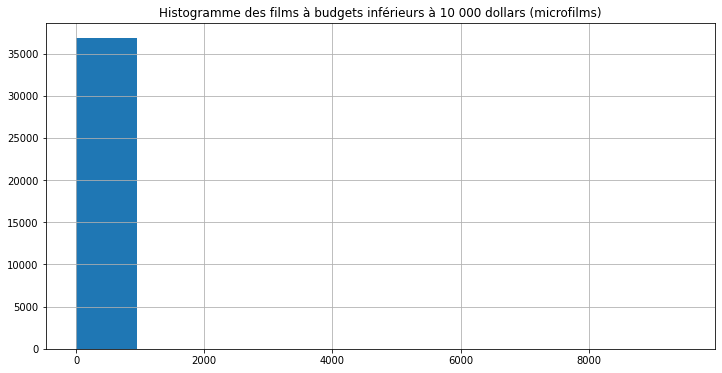

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
df.budget[df.budget < 10000].hist()
plt.title('Histogramme des films à budgets inférieurs à 10 000 dollars (microfilms)')

print('Pourcentage de microfilms (budget inférieur à 10000 dollars) à budget inférieurs à 1000 dollars : ', (len(df.budget[df.budget < 1000])/len(df.budget[df.budget < 10000]))*100,'%')

Au sein des microfilms, on compte 99.85% de films à budget inférieur à 1000 euros. Ce nombre est de fait assez suspect, on peut imaginer que la base contient des 0 pour les valeurs de budget inconnues ainsi que la plupart des nombres entre 0 et 1000 dollars de production sont des outliers dûs à des erreurs de saisies. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



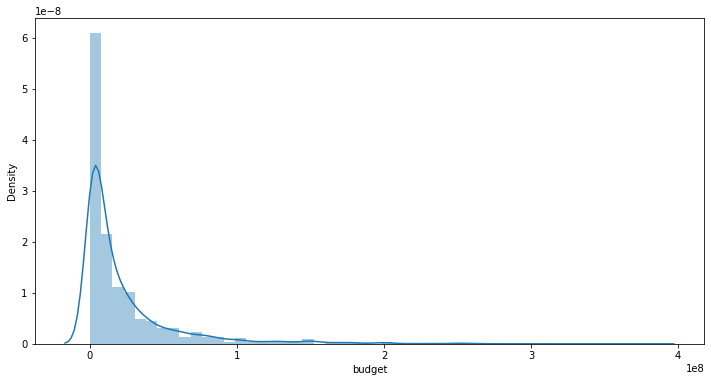

In [33]:
df_budget_ecrete = df.budget[df.budget > 10000]
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.distplot(df_budget_ecrete)
#ax.set_xscale('log')
#ax.set_yscale('log')

((array([-3.77240845, -3.54511026, -3.42022122, ...,  3.42022122,
          3.54511026,  3.77240845]),
  array([1.04e+04, 1.10e+04, 1.10e+04, ..., 2.80e+08, 3.00e+08, 3.80e+08])),
 (27726595.027183253, 22400462.640541162, 0.7991918566608213))

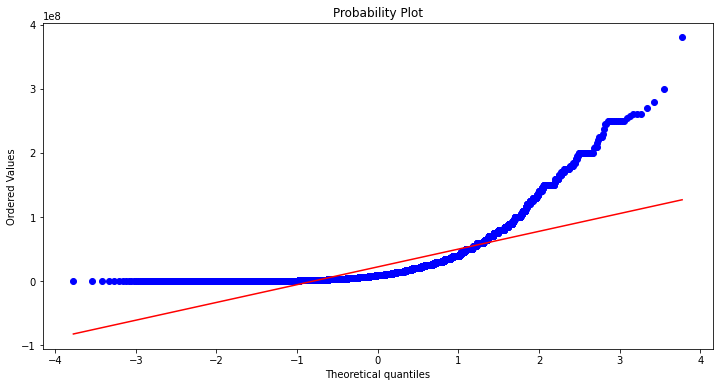

In [34]:
from scipy import stats
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,6))
stats.probplot(df_budget_ecrete, plot=sns.mpl.pyplot)

L'information sur le budget paraît peu exploitable du fait de la dispersion des données... Par conséquent, nous allons nous intéresser plus en détails aux revenus générés par le film.

# Statistiques sur les revenus

Etudions tout d'abord la proportion de films n'ayant généré aucun revenu:

In [36]:
len(df.revenue[df.revenue == 0])/len(df.revenue)*100

83.69330928605991

Ainsi, plus de 83% des films de la base n'ont généré aucun revenu.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



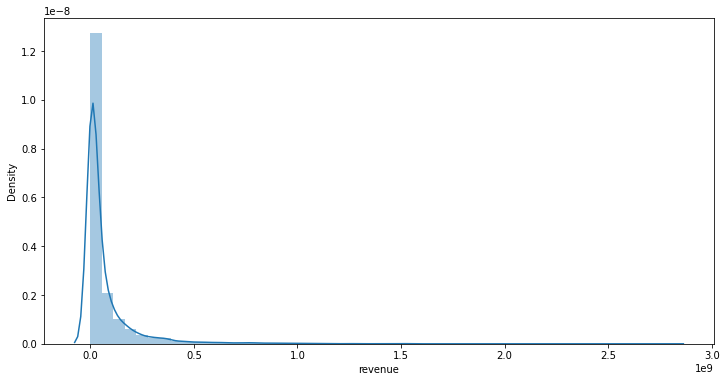

In [37]:
df_revenue_ecrete = df.revenue[df.revenue > 10000]
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.distplot(df_revenue_ecrete)
#ax.set_xscale('log')
#ax.set_yscale('log')

A travers ce graphique, on constate que la proportion de films à gros budget est très faible. De fait, nous ne pourrons pas non plus exploiter cette variable pour la modélisation. 